<a href="https://colab.research.google.com/github/SushmithaUW/Homesickness-Prediction/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import required libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [0]:

#load the data
train = pd.read_csv('data.csv')
train.head()

#remove the unwanted columns and rows containing null values
train = train.drop('Timestamp',axis=1)
train = train.drop('Unnamed: 13', axis=1)
train = train.drop('Unnamed: 14', axis=1)


#Make the column header readable
train.columns=['Age', 'Gender', 'International_Student', 'Educational_level', 'Course_difficulty', 'Networking', 'Financial_aid', 'Friends', 'Siblings', 'Howmetown_visits', 'Cooking', 'Homesickness']
train.info()

#Pre-processing data to remove any reducdancy
for column in train.columns:
    print (column)
    print(train[column].unique())
    print ('\n')

#There are same values (I don't know, Thirce, Twice, etc,) amoung columns
#We will try to uniquely represent the values of each of the column. 
df = []
df = train['Course_difficulty']
df.replace(1,'Easy',True)
df.replace(2,'Easy',True)
df.replace(3,'Moderate',True)
df.replace(4,'Moderate',True)
df.replace(5,'Difficult',True)
train['Course_difficulty'] = df
train['Course_difficulty'].unique()

df = []
df = train['Networking']
df.replace("I don't know",'Does not know about netwrking',True)
df.replace('Once','Networking happens once',True)
df.replace('Twice','Networking happens twice',True)
df.replace('Thrice or more','Networking happens often',True)
train['Networking'] = df
train['Networking'].unique()

df = []
df = train['Financial_aid']
df.replace("I don't know",'Does not know about financial aid',True)
df.replace('Yes','University provides financial aid',True)
df.replace('No','University does not provide financial aid',True)
df.replace('Thrice or more','Networking happens often',True)
train['Financial_aid'] = df
train['Financial_aid'].unique()



df = []
df = train['Friends']
df.replace('4 or more','Extrovert',True)
df.replace('3 or more','Friendly',True)
df.replace('0','Lonely',True)
df.replace('2','Introvert',True)
df.replace('5 or more','Extrovert',True)
df.replace('1','Lonely',True)
df.replace('3','Friendly',True)
df.replace('4','Extrovert',True)
train['Friends'] = df
train['Friends'].unique()

df = []
df = train['Siblings']
df.replace('0','Single Child',True)
df.replace('1','One sibling',True)
df.replace('2','Two siblings',True)
df.replace('3','Three siblings',True)
df.replace('4','Large family',True)
df.replace('5 or more','Large family',True)
train['Siblings'] = df
train['Siblings'].unique()

df = []
df = train['Howmetown_visits']
df.replace('Once','Visits once',True)
df.replace('Never','Never visits',True)
df.replace('Twice','Visits twice',True)
df.replace('Thrice or more','Visits often',True)
train['Howmetown_visits'] = df
train['Howmetown_visits'].unique()


df = []
df = train['Cooking']
df.replace('Thrice','Cooks thrice',True)
df.replace('Thrice or more','Cooks very often',True)
df.replace('2 to 3 times','Cooks twice',True)
df.replace('4 to 6 times','Cooks very often',True)
df.replace('Never','Never cooks',True)
df.replace('Everyday','Cooks everyday',True)
train['Cooking'] = df
train['Cooking'].unique()

for column in train.columns:
    print (column)
    print (train[column].unique())
    print ("\n")


#Filter out the local students and remove the nan records
train = train.dropna()
local_students = train[ train['International_Student'] == 'No' ].index
train.drop(local_students , inplace=True)
train['International_Student'].unique()
train = train.drop('International_Student', axis=1)

In [0]:
print (len(train))


55


In [0]:
for column in train.columns:
    if train[column].dtype == type(object):
        le = LabelEncoder()
        train[column] = le.fit_transform(train[column])
        

In [0]:
train.drop(['Age','Gender','Educational_level','Course_difficulty','Networking','Financial_aid','Friends','Siblings','Howmetown_visits','Cooking'], axis=1,inplace=True)
train = pd.concat([train, Age ,Gender ,Educational_level ,Course_difficulty ,Friends ,Siblings ,Howmetown_visits ,Cooking ],axis=1)



In [0]:
le = LabelEncoder()
train['Homesickness'] = le.fit_transform(train['Homesickness'])
le_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}

le_mappings

{0: '2 to 3 times', 1: '4 to 6 times', 2: 'Everyday', 3: 'Never', 4: 'Twice'}

In [0]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1 to 115
Data columns (total 11 columns):
Age                  55 non-null int64
Gender               55 non-null int64
Educational_level    55 non-null int64
Course_difficulty    55 non-null int64
Networking           55 non-null int64
Financial_aid        55 non-null int64
Friends              55 non-null int64
Siblings             55 non-null int64
Howmetown_visits     55 non-null int64
Cooking              55 non-null int64
Homesickness         55 non-null int64
dtypes: int64(11)
memory usage: 5.2 KB
None


In [0]:
X = train.drop('Homesickness',axis=1)
y_true = train['Homesickness']


In [0]:
# create kmeans object and call fit
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=170)
kmeans = kmeans.fit(train)
print("The cluster centroids are: \n", kmeans.cluster_centers_)
print("Cluster_label:\n", kmeans.labels_)
# print("Sum of distances of samples to their closest cluster center: \n", kmeans.inertia_)

The cluster centroids are: 
 [[0.40540541 0.67567568 0.02702703 1.89189189 0.67567568 1.59459459
  0.37837838 1.45945946 0.2972973  0.89189189 1.54054054]
 [0.66666667 0.88888889 1.16666667 1.5        0.66666667 1.
  0.94444444 1.77777778 2.11111111 1.66666667 1.38888889]]
Cluster_label:
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0]


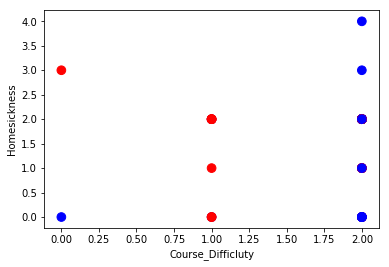

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=170)
kmeans = kmeans.fit(train)
colors = ['blue','red']

plt.scatter(train.Course_difficulty, 
            train.Homesickness,  
            c=kmeans.labels_, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            s=75)
plt.xlabel('Course_Difficluty')
plt.ylabel('Homesickness')
plt.show()


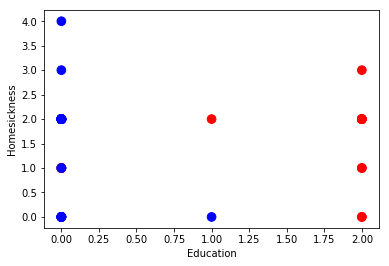

In [0]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=170)
kmeans = kmeans.fit(train)
colors = ['blue','red']

plt.scatter(train.Educational_level, 
            train.Homesickness, 
            c=kmeans.labels_, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            s=75)
plt.xlabel('Education')
plt.ylabel('Homesickness')
plt.show()


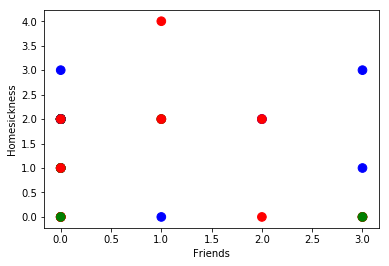

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=170)
kmeans = kmeans.fit(train)
colors = ['blue','red', 'green']

plt.scatter(train.Friends, 
            train.Homesickness, 
            c=kmeans.labels_, 
            cmap=matplotlib.colors.ListedColormap(colors), 
            s=75)
plt.xlabel('Friends')
plt.ylabel('Homesickness')
plt.show()

In [0]:
#predict the class for each data point
y_pred = kneighboursclassifier.predict(X)
print("Predictions: \n", np.array([y_pred]).T)

Predictions: 
 [[0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [2]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [0]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [2]
 [2]]


In [0]:
print("Neighbors and their Distance: \n",kneighboursclassifier.kneighbors(X, return_distance=True))

Neighbors and their Distance: 
 (array([[0.        , 1.41421356, 1.41421356],
       [0.        , 4.24264069, 4.35889894],
       [0.        , 1.        , 1.73205081],
       [0.        , 0.        , 1.        ],
       [0.        , 1.41421356, 2.        ],
       [0.        , 3.        , 3.        ],
       [0.        , 1.        , 1.41421356],
       [0.        , 1.41421356, 2.44948974],
       [0.        , 2.82842712, 3.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.73205081, 1.73205081],
       [0.        , 1.41421356, 1.41421356],
       [0.        , 1.        , 1.73205081],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.        , 1.        , 2.        ],
       [0.        , 2.64575131, 2.64575131],
       [0.        , 2.        , 2.23606798],
       [0.        , 1.

In [0]:
print("Accuracy score for the model: \n", kneighboursclassifier.score(X, y_true))

Accuracy score for the model: 
 0.6909090909090909


In [0]:
print(metrics.confusion_matrix(y_true, y_pred, labels=["Yes","No"]))